## ESTADISTICA Y VISUALIZACION


Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo. El objetivo de este pair programming es:
Hacer una exploración inicial del dataframe.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as st

In [2]:
df=pd.read_csv('world_risk_index.csv')
df.head(5)

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


- ¿Cuántas filas tiene?

In [3]:
print(f'El archivo que elegimos tiene {df.shape[0]} filas y {df.shape[1]} columnas')

El archivo que elegimos tiene 1917 filas y 12 columnas


- ¿Cuántas nulos tiene?

In [4]:
nulos = df.isnull().sum()

print(f'El archivo que elegimos tiene {sum(nulos)} nulos')


El archivo que elegimos tiene 6 nulos


- ¿Y duplicados?

In [5]:
duplicados =df.duplicated().sum()

print(f'El archivo que elegimos tiene {duplicados} filas duplicadas')

El archivo que elegimos tiene 0 filas duplicadas


- ¿Qué tipo de datos tenemos en el dataframe?


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


- Otros 

In [7]:
df.columns #Los nombres de las columnas


Index(['Region', 'WRI', 'Exposure', 'Vulnerability', 'Susceptibility',
       'Lack of Coping Capabilities', ' Lack of Adaptive Capacities', 'Year',
       'Exposure Category', 'WRI Category', 'Vulnerability Category',
       'Susceptibility Category'],
      dtype='object')

In [8]:
df['Region'].unique # Valores unicos de la columna Region

<bound method Series.unique of 0            Vanuatu
1              Tonga
2        Philippinen
3          Salomonen
4          Guatemala
            ...     
1912         Grenada
1913        Barbados
1914    Saudi Arabia
1915           Malta
1916           Qatar
Name: Region, Length: 1917, dtype: object>

In [9]:
df['Exposure'].unique # Valores unicos de la columna Exposicion.

<bound method Series.unique of 0       56.33
1       56.04
2       45.09
3       36.40
4       38.42
        ...  
1912     3.13
1913     3.46
1914     2.93
1915     1.65
1916     0.28
Name: Exposure, Length: 1917, dtype: float64>

In [10]:
df['Exposure'].min()

0.05

In [11]:
df['Exposure'].max()

99.88

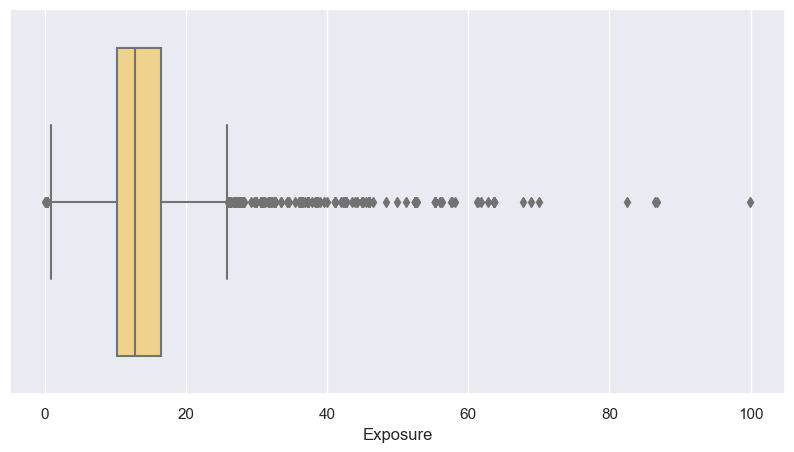

In [12]:
plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")

sns.boxplot(data = df, x =  "Exposure", color=  "#FFD97D");

In [13]:
q3 = np.percentile(df["Exposure"], [75]) # calculo cuartil 3 (Q3)

In [14]:
q1 = np.percentile(df["Exposure"], [25]) # Calculo  cuartil 1 (Q1)

In [15]:
rango_int = q3-q1 #Calculo del rango intercuartilico (Caja del boxplot)

Vemos que la mayoria de outlayers se hubican a la derecha de la grafica, por lo que vamos a calcular el bigote derecho.

In [16]:
outlayers_max = q3+ (rango_int*1,5)
outlayers_max

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_58627/2936883199.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  outlayers_max = q3+ (rango_int*1,5)


array([array([22.74]), 21.45], dtype=object)

#### `Vemos que tenemos muchos outlayers y hemos decidido analizar solo estos en base a la columna 'Exposure' para poder analizar aquellas regiones que tienen mas riesgo de sufrir desastres naturales.`
#### ` Por lo que crearemos un nuevo DataFrame solo con estos datos para trabajar con él.`

In [17]:
df_susceptibles = df[ df['Exposure'] >21.45] #Creamos un nuevo dataframe
df_susceptibles

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...
1767,Chile,11.65,30.95,37.66,19.67,58.61,34.70,2016,Very High,Very High,Low,Low
1769,Guyana,11.39,22.90,49.72,27.16,78.96,43.05,2016,Very High,Very High,Medium,Medium
1772,Dominican Republic,10.96,23.14,47.36,27.55,73.16,41.38,2016,Very High,Very High,Medium,Medium
1794,Netherlands,8.24,30.57,26.94,15.46,41.23,24.14,2016,Very High,High,Very Low,Very Low


<Figure size 800x400 with 0 Axes>

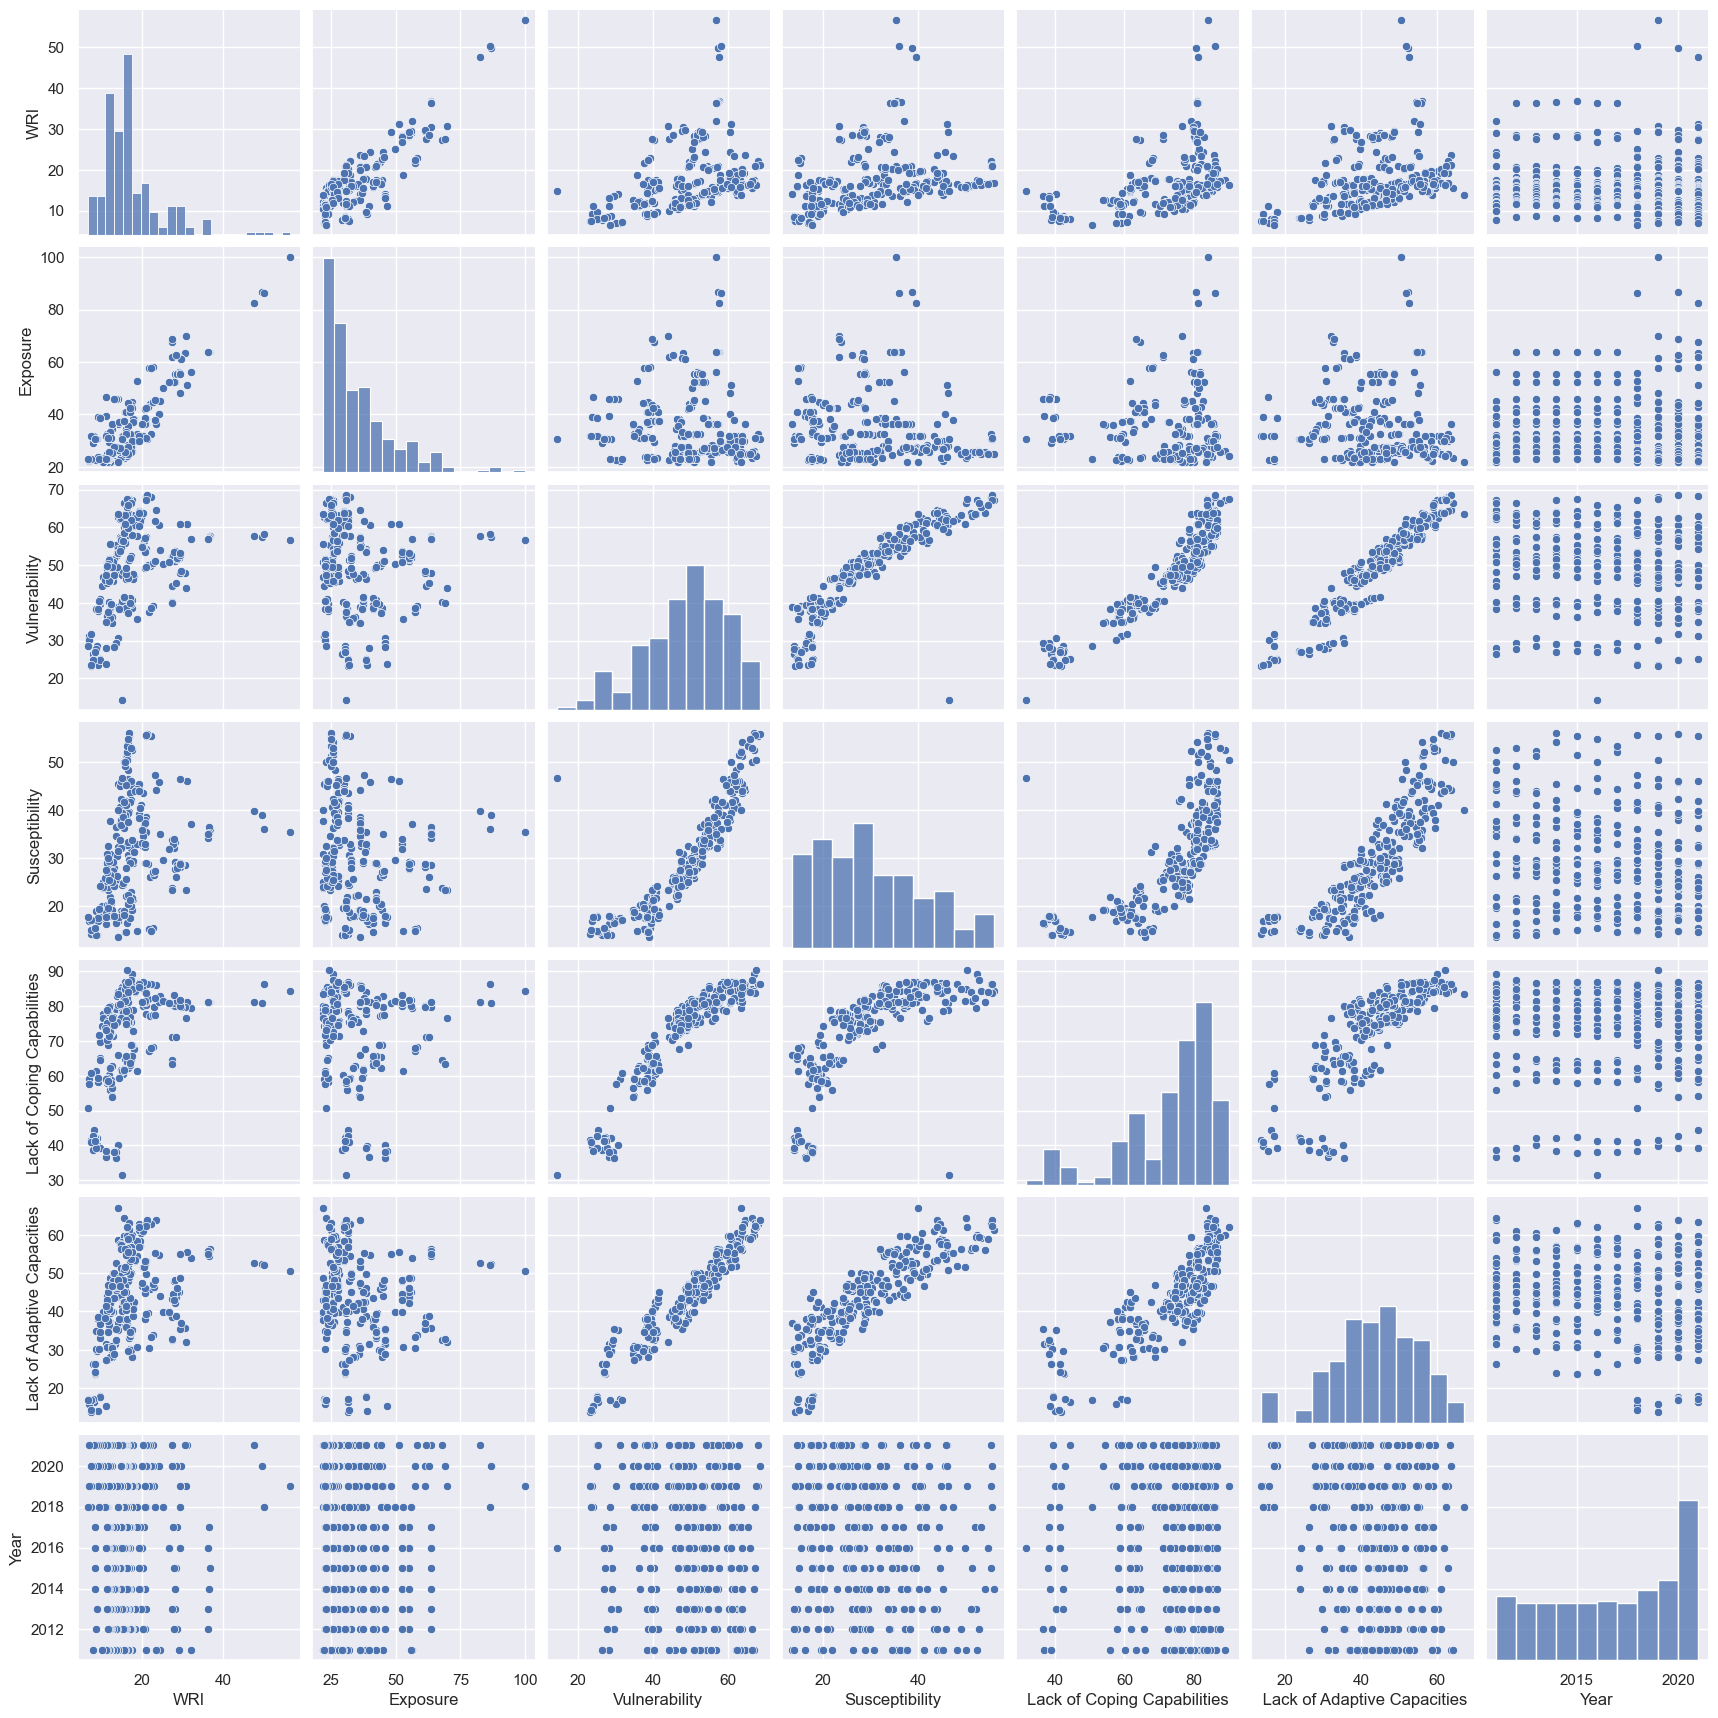

In [18]:
plt.figure(figsize =(8,4))


sns.pairplot(data = df_susceptibles)

plt.show()

In [19]:
correlacion = df_susceptibles.corr() # Calculamos la correlacion
correlacion

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_58627/2805929464.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df_susceptibles.corr() # Calculamos la correlacion


,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
WRI,1.000000,0.854587,0.406949,0.321832,0.431028,0.384041,0.042447
Exposure,0.854587,1.000000,-0.094435,-0.145025,-0.042521,-0.099360,0.105813
Vulnerability,0.406949,-0.094435,1.000000,0.889960,0.932907,0.952424,-0.107303
Susceptibility,0.321832,-0.145025,0.889960,1.000000,0.730823,0.861988,-0.113156
Lack of Coping Capabilities,0.431028,-0.042521,0.932907,0.730823,1.000000,0.824580,-0.012399
Lack of Adaptive Capacities,0.384041,-0.099360,0.952424,0.861988,0.824580,1.000000,-0.199090
Year,0.042447,0.105813,-0.107303,-0.113156,-0.012399,-0.199090,1.000000


1) Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.

In [20]:
df_susceptibles.duplicated().sum()


0

In [21]:
df_susceptibles.shape

(278, 12)

In [22]:
df_susceptibles.isnull().sum()


Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    0
Vulnerability Category          1
Susceptibility Category         0
dtype: int64

#### ` a) Investigamos el grado de riesgo relacionando con vulnerabilidad, para ver si los paises mas vulnerables por falta de recursos, también son los más expuestos.`
`Aprovecharemos que tenemos los datos cuantitativos y cualitativos.`

- Analisis de Exposure

In [23]:
df_susceptibles.loc[(df_susceptibles.Exposure==df_susceptibles['Exposure'].max())] 

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1040,Vanuatu,56.71,99.88,56.78,35.32,84.36,50.66,2019,Very High,Very High,High,High


`El region mas expuesta a desastres naturales es 'Vanuatu'`

In [24]:
df_susceptibles.loc[(df_susceptibles.Exposure==df_susceptibles['Exposure'].min())]

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
22,Honduras,12.1,21.81,55.5,37.61,80.03,48.85,2011,Very High,Very High,High,High


`La region menos expuesta es Honduras`

In [25]:
media_exposicion=df_susceptibles['Exposure'].mean()
print(f'`La media de exposicion a desastres naturales de nuestros datos es de {media_exposicion}')


`La media de exposicion a desastres naturales de nuestros datos es de 35.23312949640288


In [26]:
mediana_exposicion=df_susceptibles['Exposure'].median()
print(f'`La mediana de exposicion a desastres naturales de nuestros datos es de {mediana_exposicion}')

`La mediana de exposicion a desastres naturales de nuestros datos es de 30.95


In [27]:
desv_exposicion=df_susceptibles['Exposure'].std()
print(f'`La desviacion tipica de la  exposicion a desastres naturales de nuestros datos es de {desv_exposicion}')


`La desviacion tipica de la  exposicion a desastres naturales de nuestros datos es de 13.024768542513838


- Analisis de Vulnerability

In [28]:
df_susceptibles.loc[(df_susceptibles.Vulnerability==df_susceptibles['Vulnerability'].max())]

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1227,Papua-Neuguinea,21.12,30.79,68.58,55.66,86.23,63.85,2020,Very High,Very High,Very High,Very High


In [29]:
df_susceptibles.loc[(df_susceptibles.Vulnerability==df_susceptibles['Vulnerability'].min())]

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1858,Korea Republic of 4.59,14.89,30.82,14.31,46.55,31.59,NaN,2016,Very High,Very High,NaN,High


In [30]:
media_vulnerabilidad=df_susceptibles['Vulnerability'].mean()
print(f'`La media de vulnerabilidad a desastres naturales de nuestros datos es de {media_vulnerabilidad}')


`La media de vulnerabilidad a desastres naturales de nuestros datos es de 48.97755395683453


In [31]:
mediana_vulnerabilidad=df_susceptibles['Vulnerability'].median()
print(f'`La mediana de vulnerabilidad a desastres naturales de nuestros datos es de {media_vulnerabilidad}')


`La mediana de vulnerabilidad a desastres naturales de nuestros datos es de 48.97755395683453


In [32]:
desv_vulnerabilidad=df_susceptibles['Vulnerability'].std()
print(f'`La desviacion de vulnerabilidad a desastres naturales de nuestros datos es de {desv_vulnerabilidad}')


`La desviacion de vulnerabilidad a desastres naturales de nuestros datos es de 11.047950548576555


/Users/anamor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exposure'>

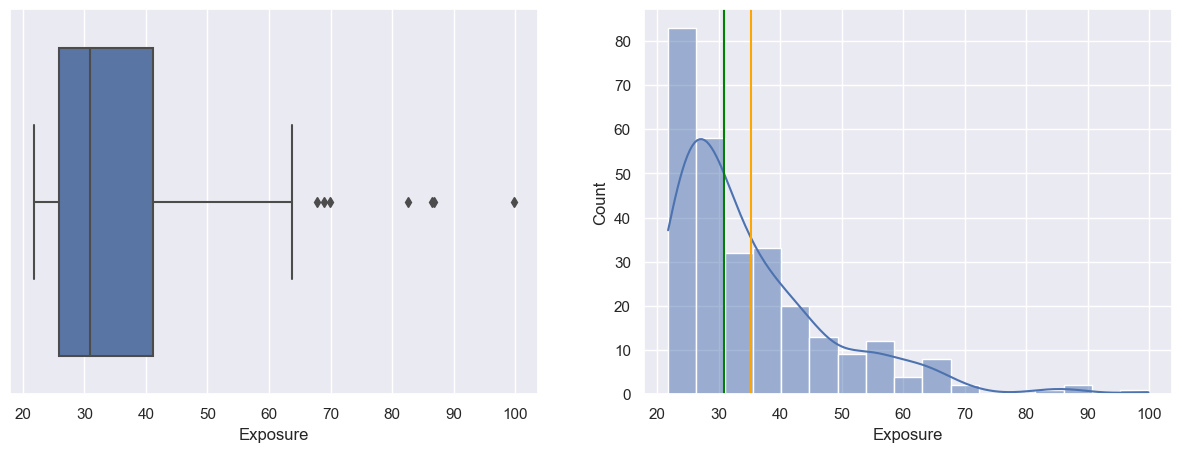

In [33]:
fig,ax = plt.subplots(1,2, figsize =( 15,5))
sns.histplot(x='Exposure', data=df_susceptibles, bins='auto',kde=True, ax=ax[1])
plt.axvline(media_exposicion, color='orange')
plt.axvline(mediana_exposicion, color='green')

sns.boxplot(df_susceptibles['Exposure'], ax=ax[0])


/Users/anamor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vulnerability'>

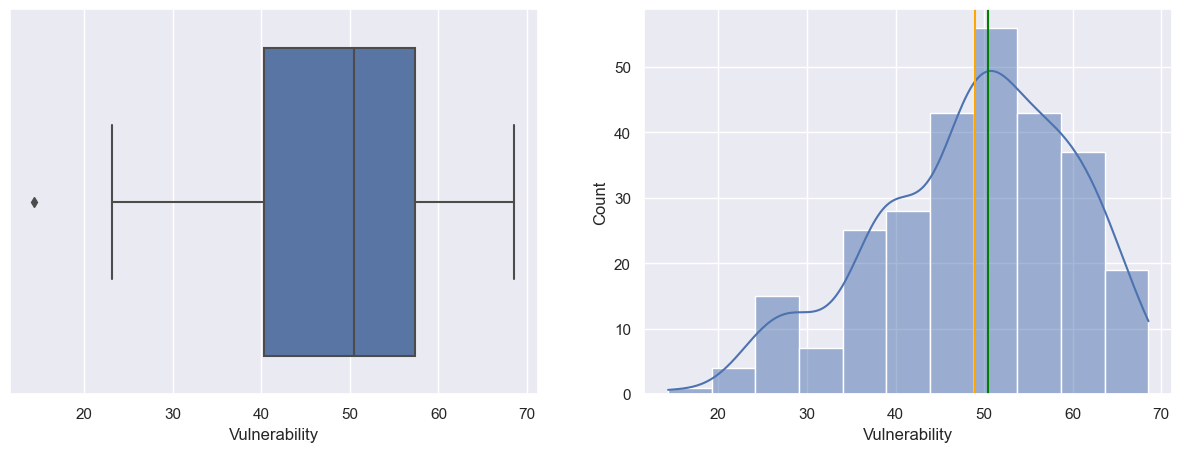

In [34]:
fig,ax = plt.subplots(1,2, figsize =( 15,5))
sns.histplot(x='Vulnerability', data=df_susceptibles, bins='auto',kde=True,ax=ax[1])
plt.axvline(media_vulnerabilidad, color='orange')
plt.axvline(mediana_vulnerabilidad, color='green')

sns.boxplot(df_susceptibles['Vulnerability'], ax=ax[0])

<AxesSubplot:xlabel='Vulnerability', ylabel='Exposure'>

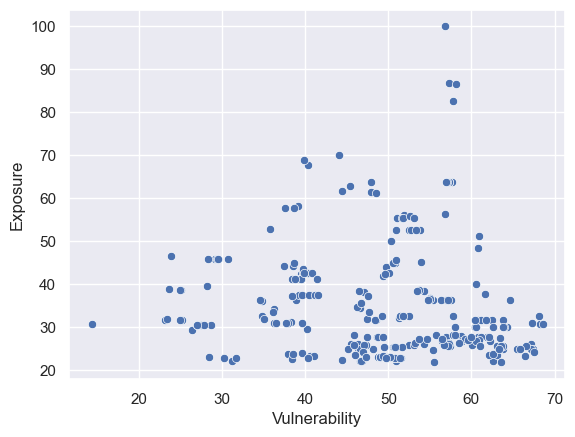

In [35]:
sns.scatterplot(x='Vulnerability',y='Exposure', data=df_susceptibles) #Analizamos la relacion entre las dos variables.

In [36]:
correlacion

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
WRI,1.000000,0.854587,0.406949,0.321832,0.431028,0.384041,0.042447
Exposure,0.854587,1.000000,-0.094435,-0.145025,-0.042521,-0.099360,0.105813
Vulnerability,0.406949,-0.094435,1.000000,0.889960,0.932907,0.952424,-0.107303
Susceptibility,0.321832,-0.145025,0.889960,1.000000,0.730823,0.861988,-0.113156
Lack of Coping Capabilities,0.431028,-0.042521,0.932907,0.730823,1.000000,0.824580,-0.012399
Lack of Adaptive Capacities,0.384041,-0.099360,0.952424,0.861988,0.824580,1.000000,-0.199090
Year,0.042447,0.105813,-0.107303,-0.113156,-0.012399,-0.199090,1.000000


#### ` b) Investigamos la relacion entre la falta de capacidad para afrontar los desastres naturales (columna: 'Lack of Coping Capabilities' ) y la vulnerabilidad.`

In [37]:
max_capacidad =df_susceptibles['Lack of Coping Capabilities'].max()
print(f'El mayor indice de falta de capacidad para afrontar desastres naturales es de {max_capacidad}')

El mayor indice de falta de capacidad para afrontar desastres naturales es de 90.28


In [38]:
min_capacidad =df_susceptibles['Lack of Coping Capabilities'].min()
print(f'El menor indice de falta de capacidad para afrontar desastres naturales es de {min_capacidad}')

El menor indice de falta de capacidad para afrontar desastres naturales es de 31.59


In [39]:
media_resp=df_susceptibles['Lack of Coping Capabilities'].mean()
print(f'La media de falta de capacidad para afrontar desastres naturales es de {media_resp}')


La media de falta de capacidad para afrontar desastres naturales es de 73.12514388489208


In [40]:
mediana_resp=df_susceptibles['Lack of Coping Capabilities'].median()
print(f'La mediana de falta de capacidad para afrontar desastres naturales es de {mediana_resp}')


La mediana de falta de capacidad para afrontar desastres naturales es de 77.57


In [41]:
desv_resp=df_susceptibles['Lack of Coping Capabilities'].std()
print(f'La desviacion de falta de capacidad para afrontar desastres naturales es de {desv_resp}')


La desviacion de falta de capacidad para afrontar desastres naturales es de 13.156901957254082


/Users/anamor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vulnerability'>

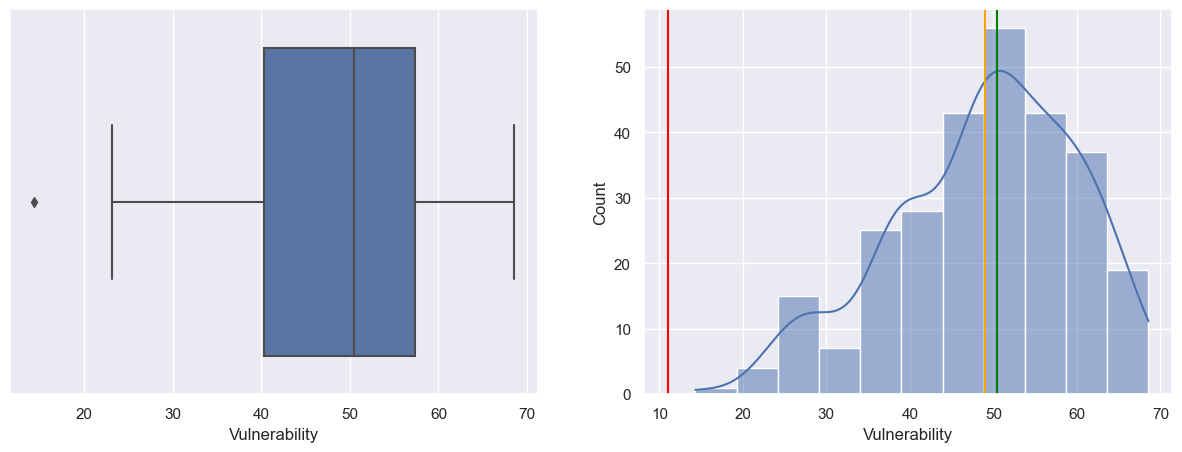

In [42]:

fig,ax = plt.subplots(1,2, figsize =( 15,5))
sns.histplot(x='Vulnerability', data=df_susceptibles, bins='auto',kde=True,ax=ax[1])
plt.axvline(media_vulnerabilidad, color='orange')
plt.axvline(mediana_vulnerabilidad, color='green')
plt.axvline(desv_vulnerabilidad, color='red')
sns.boxplot(df_susceptibles['Vulnerability'], ax=ax[0])

/Users/anamor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lack of Coping Capabilities'>

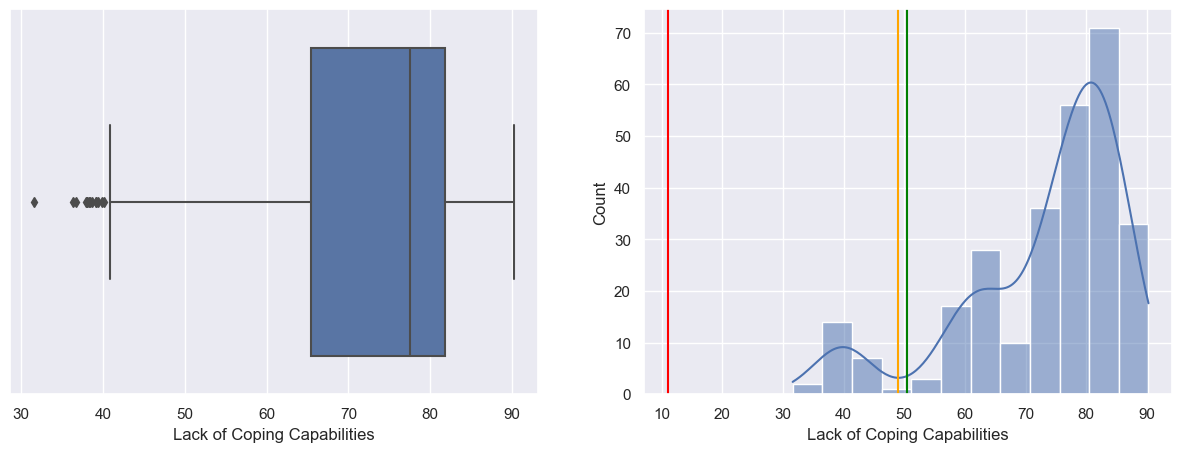

In [43]:
fig,ax = plt.subplots(1,2, figsize =( 15,5))
sns.histplot(x='Lack of Coping Capabilities', data=df_susceptibles, bins='auto',kde=True,ax=ax[1])
plt.axvline(media_vulnerabilidad, color='orange')
plt.axvline(mediana_vulnerabilidad, color='green')
plt.axvline(desv_vulnerabilidad, color='red')
sns.boxplot(df_susceptibles['Lack of Coping Capabilities'], ax=ax[0])


<AxesSubplot:xlabel='Vulnerability', ylabel='Lack of Coping Capabilities'>

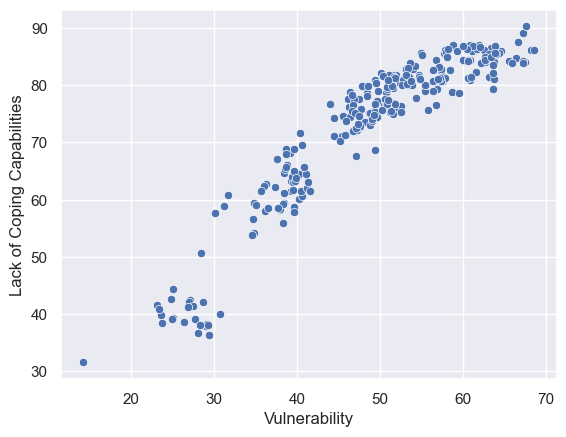

In [44]:
sns.scatterplot(x='Vulnerability',y='Lack of Coping Capabilities', data=df_susceptibles)

In [45]:
variacion_lack= desv_resp/media_resp
variacion_lack

0.17992309154242012

In [46]:
variacion_vul= desv_vulnerabilidad/media_vulnerabilidad
variacion_vul

0.2255717089978292

`Ahora vamos a analizar la falta de capacidad de respuesta pero comparando con las categorias de vulnerabilidad`

<AxesSubplot:xlabel='Vulnerability Category', ylabel='Lack of Coping Capabilities'>

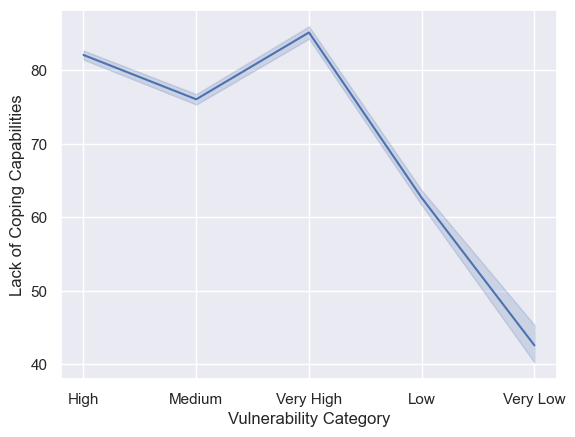

In [47]:
sns.lineplot(x=df_susceptibles['Vulnerability Category'], y=df_susceptibles['Lack of Coping Capabilities'], data=df_susceptibles)

In [50]:
df_susc_media=df_susceptibles.groupby('Vulnerability Category')["Lack of Coping Capabilities"].mean()

In [51]:
df_susc_media=pd.DataFrame(df_susc_media).reset_index().sort_values('Lack of Coping Capabilities')

In [52]:
df_susc_media


,Vulnerability Category,Lack of Coping Capabilities
4,Very Low,42.579615
1,Low,62.669074
2,Medium,76.076216
0,High,82.112245
3,Very High,85.174400


<BarContainer object of 5 artists>

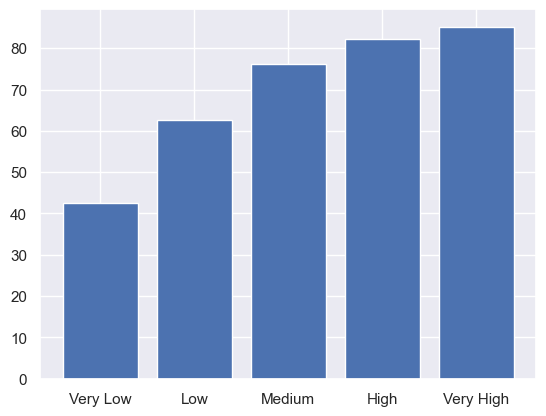

In [53]:
plt.bar(df_susc_media['Vulnerability Category'],df_susc_media["Lack of Coping Capabilities"])

`Existe una relacion bastante directa entre estos dos factores. A mayor falta de capacidad de respuesta, mayor vulnerabilidad.`

2) Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

Planteo a) investigamos el grado de riesgo relacionando con vulnerabilidad, para ver si los paises mas vulnerables por falta de recursos, también son los más expuestos.
Aprovecharemos que tenemos los datos cuantitativos y cualitativos.

`Conclusion:`

`Existe cierta tendencia en los datos, los paises mas vulnerables, si son los que coinciden con mayor indice de exposición a desastres, pero no es relacion de causalidad.`
`Igualmente recordamos que estamos analizando los outlayers.`

In [48]:
correlacion['Vulnerability']['Exposure']

-0.09443469014263906

`Podemos observar a traves del coeficiente de correlacion que la relacion entre estas variables es inversa y mas cercana a cero, por lo que estan poco correlacionadas.`

Planteo b) Investigamos si la falta de recursos de afrontamiento influye en la vulnerabilidad ante los desastres.

`Conclusion:`

`Existe una relacion bastante directa entre estos dos factores. A mayor falta de capacidad de respuesta, mayor vulnerabilidad.`

In [49]:
correlacion['Vulnerability']['Lack of Coping Capabilities']

0.932907338219939

`A traves del coeficiente de correlacion podemos ver esta relacion, el mismo es positivo lo que  nos marca una relacion directa y esta cercano a 1 por lo que ambas variables estan muy correlacionadas.`

` Al comparar  la falta de capacidad de respuesta con las categorias de vulnerabilidad terminamos de concluir que claramente las regiones con  mayor vulnerabilidad  son aquellas que tienen mayor falta de capacidad de respuesta. Lo podemos observar en el siguiente histograma.`

<BarContainer object of 5 artists>

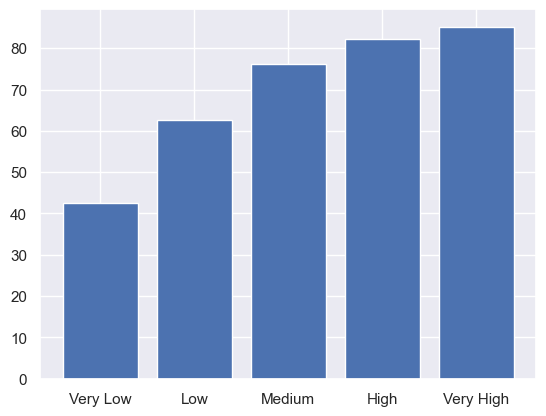

In [57]:
plt.bar(df_susc_media['Vulnerability Category'],df_susc_media["Lack of Coping Capabilities"])